> ## Make a copy of this notebook (File menu -> Make a Copy...)

### Homework Question 1

Write succinct and clear answers to the following questions:

* Why do we want a predictor not to be *biased*?
* Why do we want a predictor not to have large *variance*?
* Why do these two often work in opposition to one another?

We do not want to have bias in a predictor because large bias indicates a large difference between the predicted value and the expected value that we obtain, which would produce undesirable/incorrect/inaccurate results. We do not want to have variance because large variance indicates that the prediction model has high variability in its predictions for a given point, which could also produce faulty or unreliable results and shows that this model is very inconsistent in its predictions. 

Both of these often work in opposition to one another because decreasing one typically results in an increase in the other; for instance, if there is high bias, it is probable that there is low variance if the model is consistently predicting the same value, albeit the wrong one.

### Homework Question 2
For the same set of points as in Question 8 from the lab, find the best fit line. Also find a cubic function that passes through all the points precisely. Plot these functions, as well as the quadratic from Question 8, and your points. Rank the three functions in order of bias as a model for the data points, then in order of variance. 

**Note:** we have no real way of quantifying variance. Your answer should include some detail as to how you decide on your ranking. Question 3 from the lab may help.

[-0.01694915 -0.72881356]
[ 2.24246231 -6.82035176 -3.99748744]
[ 0.44166667  0.225      -6.21666667 -2.        ]


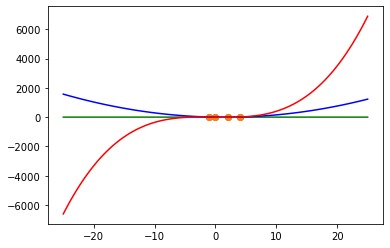

In [1]:
import numpy as np
from Qiureferencefunctions import rowred, rowaddmult, swaprows,backsub,rowredpivot,LU,fwdsub
import matplotlib.pyplot as plt
a = np.array([-1,2,0,4])
v = np.array([4,-10,-2,5])

#line of best fit
rows = a.shape[0]
Al = np.zeros((rows,2))
for i in range(0,rows-2):
    x = pow(a,i)
    Al[:,i] = x
Al =np.fliplr(Al)

Alt = Al.T @ Al
V = Al.T @ v
U,L,P = LU(Alt)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))
x = np.linspace(-25,25,100) 
y1 =  -0.01694915*x  -0.72881356
plt.plot(x,y1,'g')
plt.scatter(a,v)

#quadratic
rows = a.shape[0]
Aq = np.zeros((rows,3))
for i in range(0,rows-1):
    x = pow(a,i)
    Aq[:,i] = x
Aq =np.fliplr(Aq)

Aqt = Aq.T @ Aq
V = Aq.T @ v
U,L,P = LU(Aqt)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))
x = np.linspace(-25,25,100) 
y1 =  2.24246231*x**2 -6.82035176*x -3.99748744
plt.plot(x,y1,'b')
plt.scatter(a,v)

#cubic
Ac = np.zeros((rows,rows))
for i in range(0,rows):
    x = pow(a,i)
    Ac[:,i] = x
Ac =np.fliplr(Ac)

U,L,P = LU(Ac)
v = P@v
y = fwdsub(L,v)
print(backsub(U,y))
x = np.linspace(-25,25,100) 
y1 =  0.441666*x**3 +0.225*x**2 - 6.21666666*x -2
plt.plot(x,y1,'r')


Ranking the models in order of least to most bias is cubic, quadratic, and linear, and the rankings for variability from least to most is linear, quadratic, and cubic. The model with the least bias here is the cubic function because it is the one that is directly fitting each of the points that we are giving it (because we have four points, and in order to create a cubic function, we need to have a 4x4 A matrix, which would guarantee with a set of four points that there is in fact a function that goes through each of those points). Thus, it is technically the most "accurate" model for the points that we are giving it.

As for variance, the rankings from least to most is linear, quadratic, and cubic. This is because if we repeated this function with a different set of data, it would be most generalizable to a variety of different points with a linear function, in comparison with a quadratic or cubic, which increase in their specificity to the given points as the degree increases.

### Homework Question 3
Given your classifier from Question 14 in the lab, and given a point from your combined set of points, consider the question "Is this point in the cluster on the top left?' Compute the following and explain your answers (note, this is similar to Question 15 from the lab):
1. The probability of getting a false positive (that is, a 'yes' answer when the correct answer is 'no'.);
1. The probability of getting a false negative (that is, a 'no' answer when the correct answer is 'yes'.).
    
**Note:** You may do this question using code, or using mathematical analysis of your line and clusters. Bonus points for doing both and explaining why your answers (may) differ.

1. The probability of getting a false positive in this case is the probability of getting a blue dot above the line. By calculating the given y-values that are above the expected value from our classifier line, and then calculating the proportion of these values above the classifier that are in fact blue, we got a total of 96 points above the classifier, and 10 above the classifier that are actually blue. This is 10/96 or approximately 0.104167.
Analyzing the probability using the area of the cluster, for the false positive, we just have to find the portion of the blue cluster above the line divided by the portion of the red cluster above the line.

2. The probability of getting a false negative in this case is the probability of getting a red dot below the line. By calculating the given y-values that are below the expected value from our classifier line, and then calculating the proportion of these values above the classifier that are in fact red, we got a total of 104 points below the classifier, and 14 below the classifier that are actually red. This is 14/104 or approximately 0.134615.
Analyzing the area of the clusters to solve this, we can find the area of overlap of the blue cluster contained in (8,4) and (12,8) and the red cluster contained in (5,5) and (10,10). 

[-0.34884877  0.21474861  1.55619634]
96 10
104 14


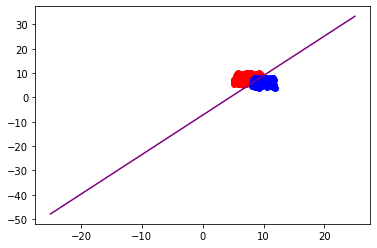

In [2]:
def rectangle(array, corner1x, corner1y, corner2x, corner2y):
    np.random.seed(20)
    array[:,0] = (corner2x-corner1x)*np.random.rand(100)+corner1x 
    array[:,1] = (corner2y-corner1y)*np.random.rand(100)+corner1y 
    return array
red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 5,5,10,10)
blue = rectangle(blue, 8,4,12,8)
A = np.ones((200,3))
A[0:100,0:2] = red
A[100:200,0:2] = blue

v = np.ones((200,1))
v[100:,0] = -1
At = A.T @ A
V = A.T @ v
U,L,P = LU(At)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))

plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
y1 =  (0.34884877*x  - 1.55619634)/0.21474861
plt.plot(x,y1,'purple')

totalpos = 0;
fpos= 0;
for i in range (0,200):
    x1 = A[i][0]
    y1 = A[i][1]
    y = (0.34884877*x1  - 1.55619634)/0.21474861
    if y1>=y:
        totalpos+=1
        if i >=100:
            fpos+=1
print(totalpos, fpos)

totalneg = 0;
fneg= 0;
for i in range (0,200):
    x1 = A[i][0]
    y1 = A[i][1]
    y = (0.34884877*x1  - 1.55619634)/0.21474861
    if y1<=y:
        totalneg+=1
        if i <100:
            fneg+=1
print(totalneg, fneg)

### Homework Question 4

In Question 15 of the lab and Question 3 above, you likely used the criterion 'Is $f(x,y)$ positive or negative?' to decide which cluster the point was in. This may not be the best possible criterion given the data you generated. You might get better results if the question was 'Is $f(x,y)>c?$' for some non-zero number c.

1. Given the data you generated, find the number c that gives the best classifier. Write code that zeros in on the best c by examining a series of possible numbers c between $-1$ and $1$. Perhaps start by looking at different c's separated by 0.1, then 'zoom in' once you know which two of those are 'best'. You should aim to get the best c (i.e. the one that minimizes the total error - false positives plus false negatives) to two or three decimal places. What criteria did you use to decide what the ideal c was?
1. Generate another set of data in the same clusters, and apply your classifier to it with your ideal c from the first part of this question. Do you get the same error rate? Why or why not? 

In [3]:
def rectangle(array, corner1x, corner1y, corner2x, corner2y):
    np.random.seed(10)
    array[:,0] = (corner2x-corner1x)*np.random.rand(100)+corner1x 
    array[:,1] = (corner2y-corner1y)*np.random.rand(100)+corner1y 
    return array
red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 5,5,10,10)
blue = rectangle(blue, 8,4,12,8)
A = np.ones((200,3))
A[0:100,0:2] = red
A[100:200,0:2] = blue
v = np.ones((200,1))
v[100:,0] = -1
At = A.T @ A
V = A.T @ v
U,L,P = LU(At)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))
#print(A)
totalpos = 0;
fpos= 0;
totalneg = 0;
fneg= 0;
for i in range (0,200):
    x1 = A[i][0]
    y1 = A[i][1]
    a = -0.34154203*x1+  0.18262083*y1+  1.76717492
    if a>=0.1:
        totalpos+=1
        if i >=100:
            fpos+=1
    if a<0.1:
        totalneg+=1
        if i <100:
            fneg+=1
print(totalpos, fpos, fpos/totalpos)
print(totalneg, fneg, fneg/totalneg)
print(fpos/totalpos + fneg/totalneg)

#0  :0.23878205128205127
#0.1:0.18831168831168832
#0.2:0.20833333333333331
#0.3:0.2248062015503876


# f(x,y) =-0.34884877x+  0.21474861y+  1.55619634

[-0.34154203  0.18262083  1.76717492]
85 8 0.09411764705882353
115 23 0.2
0.29411764705882354


1. We got our c, based on our random seed iteration of data, to be 0.1, and the criteria we used to decide what this ideal c would be is that it is the c value that minimizes the total error of false positives plus false negatives. In our case, due to the data that we happened to randomly generate, even going into three decimal places, we were not able to get any better c value than 0.1.
2. We don't get the same error rate, because we are working with a completely different data set that has slightly different values, even though they are made within the same boundaries.